<a href="https://colab.research.google.com/github/daniyar-udel/PUS2024_DAbykhanov/blob/main/HW3/PUS_HW_3_assignment_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTIVARIATE LINEAR REGRESSION

# 1) read in the data
read in the data on water consumption, I extracted it from https://www.mdpi.com/2079-9276/8/3/156 and saved it in HW3 as water_consumption.csv

We are going back to this problem after we study Classification and Regression Trees and we will try to model this data with an Random Forest

In [ ]:
import pandas as pd
df = pd.read_csv('water_consumption.csv', index_col=0)

In [ ]:
df.head()

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15,24.336416,6.481994,0.659460,502348.816168,197168.749996,37.706850,2.960570e+06,0.677396,0.640112
2010-08-29,2010-08-29,25.037518,10.852795,0.659460,502348.816168,198457.438148,35.784861,2.965557e+06,5.821554,0.641042
2010-09-12,2010-09-12,25.037518,10.832737,0.659460,502348.816168,198457.438148,41.619670,2.965557e+06,22.124608,0.641042
2010-09-26,2010-09-26,25.037518,12.346707,0.658733,513199.230595,200091.929540,47.335604,2.977833e+06,22.982144,0.641244
2010-10-10,2010-10-10,25.104217,13.063567,0.658733,513199.230595,201419.215320,52.424959,2.977833e+06,75.940850,0.641244


the first column is a date. To ensure it as read in _as a date variable_ force a conversion to datetime

In [ ]:
# prompt: convert the second column of df to datetime

import pandas as pd
df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])


In [ ]:
#using df.info you get the data type for each feature (=column) - datetime sows as "object"
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 2010-08-15 to 2018-02-18
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   197 non-null    object 
 1   Max_Temperature        197 non-null    float64
 2   Min_Temperature        197 non-null    float64
 3   HDI                    197 non-null    float64
 4   Household_Connections  197 non-null    float64
 5   Water_Consumption      197 non-null    float64
 6   Humidity               197 non-null    float64
 7   Population             197 non-null    float64
 8   Rainfall               197 non-null    float64
 9   Windspeed              197 non-null    float64
dtypes: float64(9), object(1)
memory usage: 21.0+ KB


plot all fratures against Date. Note, to see all plots in a single window I created a 3x4 matrix of axes. First I create a figure of the appropriate size with `plt.figure(figsize=(15, 10))`. Then I populate each subplot with `ax = plt.subplot(3, 4, 1)`: this sets the specific subplot to the axis object called `ax`. The numbre in parenthesis are: the number of axes rows (3), the number of axes columns (4) and the specific subplot number, counted let to right and top to bottom. I put the target variable in the top left (subplot 1) with `ax = plt.subplot(3, 4, 1)`

I want **you** to plot all other variables in the second and third row: start with `ax = plt.subplot(3, 4, 5)` and go through `ax = plt.subplot(3, 4, 12)`, changing the name of the variable to be plotted


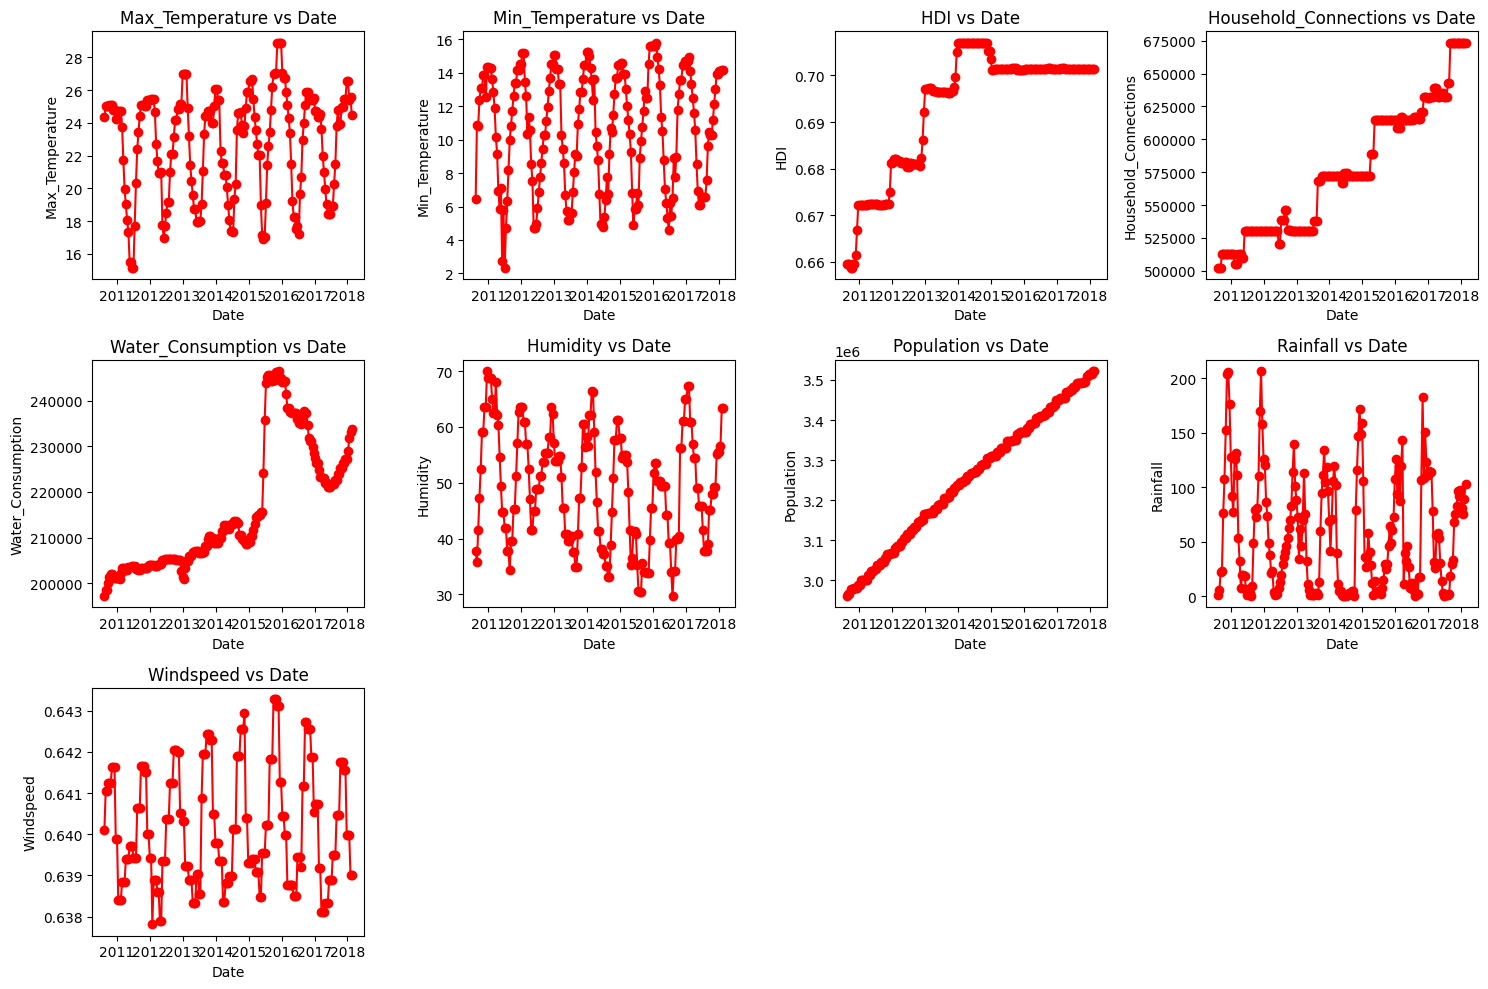

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

# List of feature columns to plot (excluding 'Date')
feature_columns = ['Max_Temperature', 'Min_Temperature', 'HDI', 'Household_Connections', 'Water_Consumption', 'Humidity', 'Population', 'Rainfall', 'Windspeed']

# Plot each feature in the subplots
for i, feature in enumerate(feature_columns):
    ax = plt.subplot(3, 4, i + 1)  # Starting from subplot 1 to 9 (9 features)
    ax.plot(df['Date'], df[feature], marker='o', linestyle='-', color='r')
    ax.set_title(f'{feature} vs Date')
    ax.set_xlabel('Date')
    ax.set_ylabel(feature)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# 2) Descriptive statistics

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


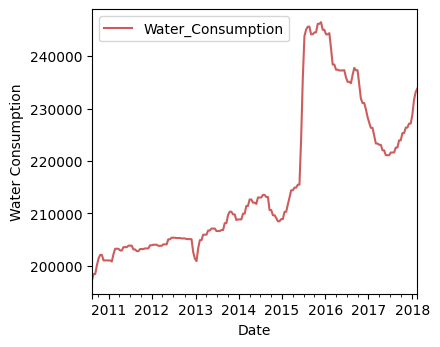

In [ ]:
# prompt: plot all fratures against Date

import matplotlib.pyplot as plt

# Plotting all features against Date
plt.figure(figsize=(15, 10))

ax = plt.subplot(3, 4, 1)
df.plot('Date', 'Water_Consumption', ax=ax, color='IndianRed')
plt.xlabel('Date')
plt.ylabel('Water Consumption')


plt.tight_layout()
plt.show()


### CAPTION HERE

In [ ]:
# use the method describe to see the statistical properties of the dataframe
df.describe()

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.000000,197.000000
mean,22.820151,10.755184,0.693206,575469.302905,216086.151748,49.327576,3.253261e+06,56.300944,0.640164
std,3.214211,3.450827,0.013474,48696.828622,14132.209414,10.165083,1.627993e+05,52.049954,0.001396
min,15.146338,2.336682,0.658733,502348.816168,197168.749996,29.708175,2.960570e+06,-0.031489,0.637809
25%,20.275245,7.596494,0.681300,530077.653037,204110.307828,40.525643,3.115161e+06,7.538785,0.639014
50%,23.964625,11.355749,0.701456,572273.709141,210313.350617,49.408814,3.268602e+06,40.916367,0.639882
75%,25.104217,13.930920,0.701474,614469.765245,226332.627614,57.033724,3.390970e+06,96.142387,0.641277
max,28.896027,15.808946,0.707032,673544.243791,246476.038257,70.025291,3.522545e+06,206.857482,0.643281


### COMMENT HERE

Plot a histogram of each feature separately. Comment on the distributions: e.g., which are bell shaped, which are multi-peaked, anything you think is notable

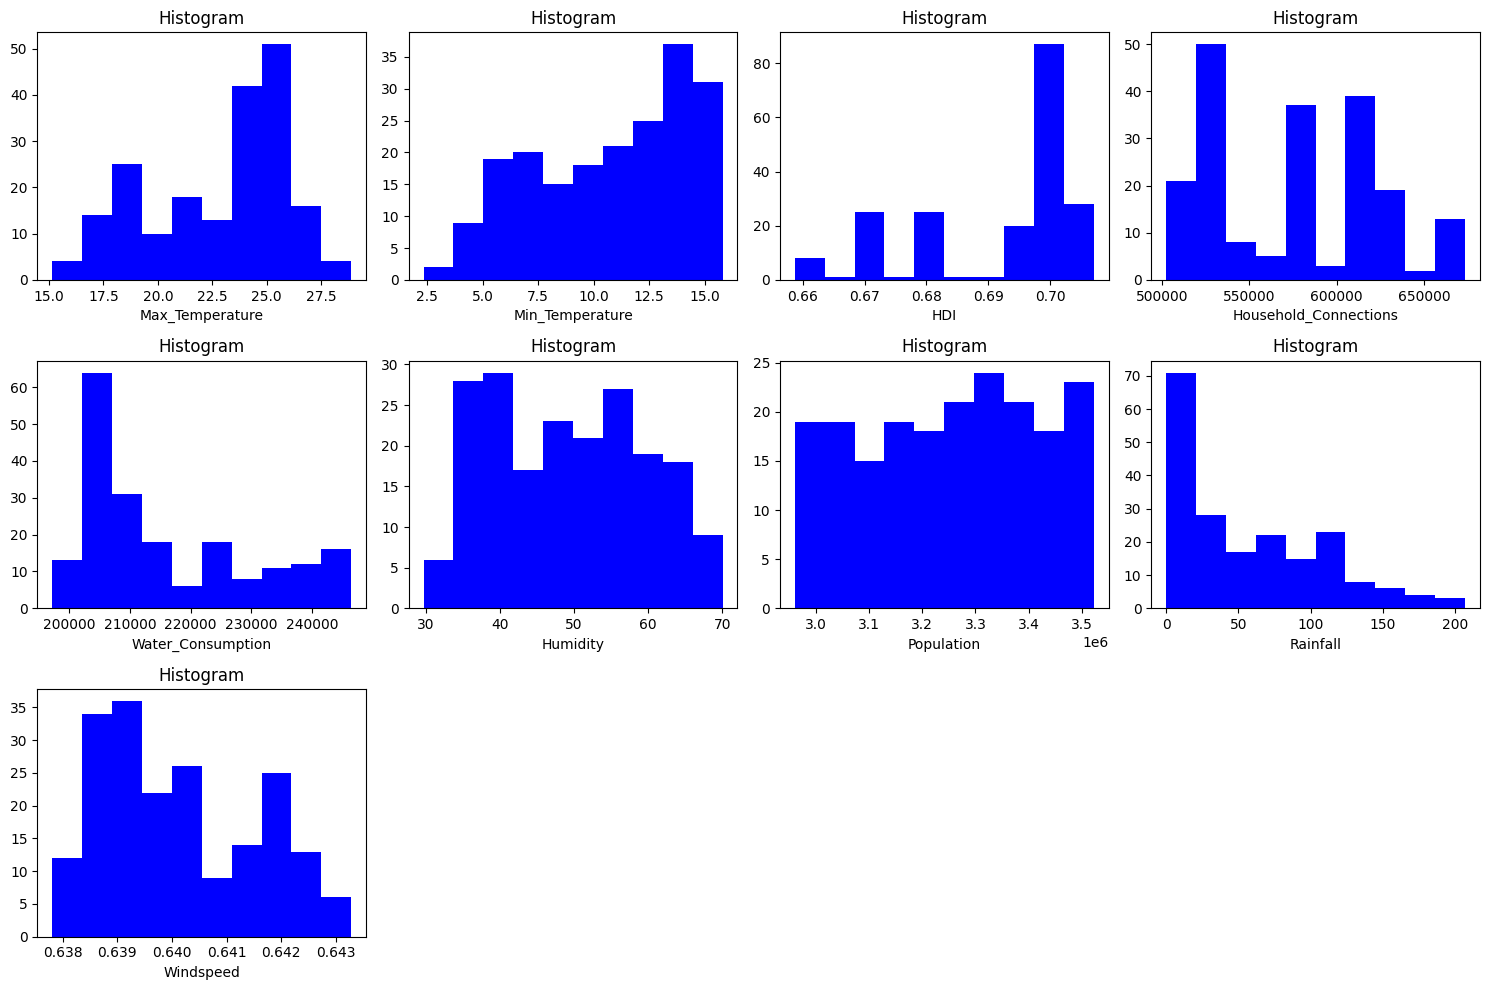

In [ ]:
plt.figure(figsize=(15, 10))

# List of feature columns to plot (excluding 'Date')
feature_columns = ['Max_Temperature', 'Min_Temperature', 'HDI', 'Household_Connections', 'Water_Consumption', 'Humidity', 'Population', 'Rainfall', 'Windspeed']

# Plot each feature in the subplots
for i, feature in enumerate(feature_columns):
    ax = plt.subplot(3, 4, i + 1)  # Starting from subplot 1 to 9 (9 features)
    ax.hist(df[feature], color='blue')
    ax.set_title(f'Histogram')
    ax.set_xlabel(feature)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### It could be seen that there is no normal distribuation, most of the histograms are non-semetric

# 3) Exploratory data analysis

Look at the correlation of the variables, pay attention to what is linearly correlatefd with the Water Consumption. If we had a single variable with high linear correlation with the target, we could try a univariate linear regression.

<Axes: >

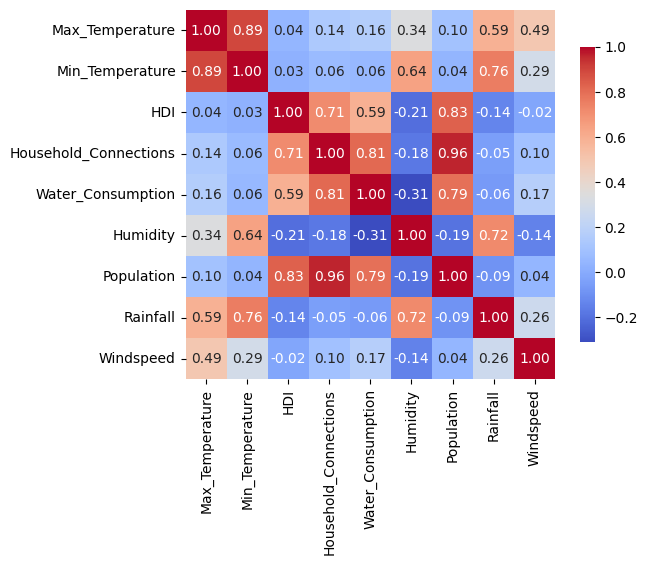

In [ ]:
import seaborn as sns

df_copy = df.copy()
corr = df_copy.iloc[:,1:].corr()

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})

### CAPTION HERE:
QUESTION (answer here) - can you guess what the maximum result with can get with unvariate linear regression based on the correlation result and the model's R^2? _hint_ https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide-2.php#:~:text=What%20is%20the%20Coefficient%20of,0.6%20x%200.6%20%3D%200.36).

# 3) Linear Regression

## 3A) Univariate model

Start with a univariate linear regression, choose the variable with the highest coefficient. Choose whichever model you prefer.

In [ ]:
# _your code here_
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

y = df_copy['Water_Consumption']
X  = df_copy[['Household_Connections']]


model_univariate = LinearRegression(fit_intercept=True)
model_univariate.fit(X, y)
prediction = model_univariate.predict(X) # make the prediction of the model based on the full input dataset (X)
print('R2_score:', r2_score(y, model_univariate.predict(X)))

R2_score: 0.6587042749519958


Text(0, 0.5, 'Water Consumption')

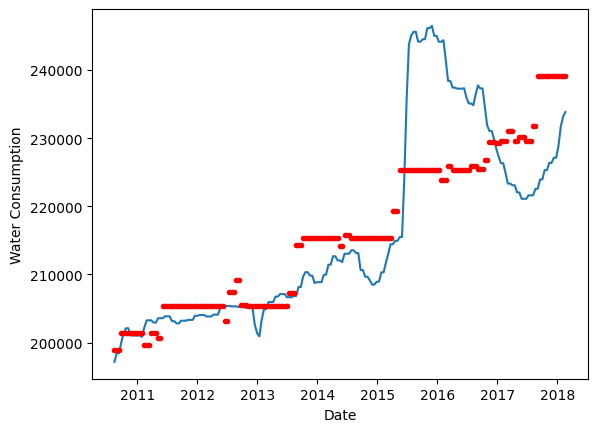

In [ ]:
import pylab as plt
plt.plot(df['Date'], y)
plt.plot(df['Date'], prediction, 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

### CAPTION HERE

#3B) multivariate model with statsmodels

One method for linear regression is the statsmodels Ordinary Least Square. I made the model below. Look at the P>|t| column of the report. NOTE: that represents the probability that "by chance" the variable would have that influence on the model, even if it did not explain the independent variable.

In [ ]:
# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable

import statsmodels.formula.api as smf

# Define the formula for the regression
formula = 'Water_Consumption ~ Max_Temperature + Min_Temperature + HDI + Household_Connections + Humidity + Population + Rainfall + Windspeed'

# Fit the model
model = smf.ols(formula, data=df).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Water_Consumption   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     63.85
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.47e-49
Time:                        22:14:48   Log-Likelihood:                -2032.3
No. Observations:                 197   AIC:                             4083.
Df Residuals:                     188   BIC:                             4112.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.818e+

look at the R^2 above, and at the P>|t|, what do they represent?

Assiming a p-value of 0.05, report in a cell of text below _which variables are significant in the fit_:


### It could be seen that r2_score is equal to 0.731 it represents a good model which is make prediction, but r2_score isn't on a good level. p>{t}  says how each variable effect on a target.

###  If p-value euqal to 0.05 so the next variables effect on a target: Max_temperature, Min_temperature, HDI, Household_connection, Humidity, Population. So all of this variables are significant in the fit


# 3C) Now use sklearn like in class and lets do things right! training-test split!


### 3C - 1)
First select the numerical columns and store them in a list called numerical_features

In [ ]:
# prompt: whiten the dataframe


# Select the numerical features
numerical_features = df.drop(['Date', 'Water_Consumption'], axis = 1).columns
numerical_features

Index(['Max_Temperature', 'Min_Temperature', 'HDI', 'Household_Connections',
       'Humidity', 'Population', 'Rainfall', 'Windspeed'],
      dtype='object')

### 3C - 2) standardize the features

NOTE THE NUMERICAL FEATURES: they live in very different regimes! for example household connections ins in the ~100,000, while wind speed is ~0.1.

Before modeling the data with a linear regression it is apprioriate to STANDARDIZE the features: subtracting the mean and dividing by the standard deviation, so that they are mean=0 std=1. Note: this does not change the **shape** of the distribution, it just translates it and shrinks it

Thankfully, sklearn offers a library of functions for preprocessing the data: standardize the features with sklearn StandardScaler. Like all sklearn functions, first create an object, then fit it to the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features
scaler.fit(df[numerical_features])

StandardScaler()

to generate the scaled features transform the original feature set

In [ ]:
scaled_features = scaler.transform(df[numerical_features])
scaled_features

array([[ 0.47293977, -1.24146403, -2.51082218, ..., -1.80243935,
        -1.07137969, -0.03718638],
       [ 0.69162118,  0.02835829, -2.51082218, ..., -1.77172968,
        -0.97229672,  0.63119909],
       [ 0.69162118,  0.02253108, -2.51082218, ..., -1.77172968,
        -0.65827933,  0.63119909],
       ...,
       [ 0.80744552,  0.97968328,  0.61521731, ...,  1.6134208 ,
         0.36029122, -0.12687215],
       [ 0.86304614,  0.98521971,  0.61521731, ...,  1.65830416,
         0.6399626 , -0.82569644],
       [ 0.52422241,  0.98521971,  0.61521731, ...,  1.65830416,
         0.89472364, -0.82569644]])

Plot a histogram of each feature _after_ standardizing compare it to the plot above: is the shape the same? it sholud be identical! but the x-axis should be different

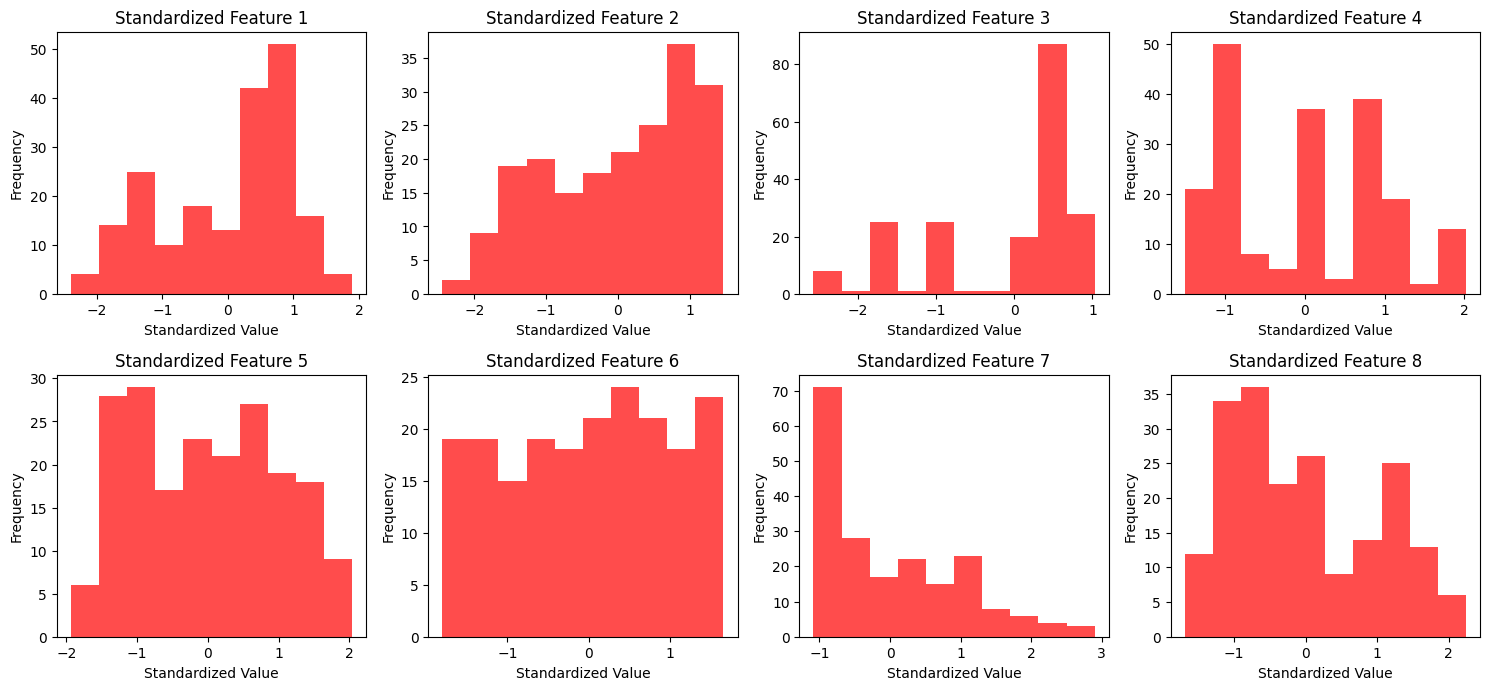

In [ ]:
plt.figure(figsize=(15, 10))

# List of feature columns to plot (excluding 'Date')

# Plot each feature in the subplots
for i in range(scaled_features.shape[1]):
    ax = plt.subplot(3, 4, i + 1)
    ax.hist(scaled_features[:, i], bins=10, alpha=0.7, color='r')
    ax.set_title(f'Standardized Feature {i+1}')
    ax.set_xlabel('Standardized Value')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

save the features in a new dataset

In [ ]:
df_copy = df.copy()
# Transform the numerical features
df_copy[numerical_features] = scaler.transform(df[numerical_features])

# Print the whitened DataFrame
df_copy

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15 00:00:00,0.472940,-1.241464,-2.510822,-1.505371,197168.749996,-1.146113,-1.802439,-1.071380,-0.037186
2010-08-29,2010-08-29 00:00:00,0.691621,0.028358,-2.510822,-1.505371,198457.438148,-1.335672,-1.771730,-0.972297,0.631199
2010-09-12,2010-09-12 00:00:00,0.691621,0.022531,-2.510822,-1.505371,198457.438148,-0.760205,-1.771730,-0.658279,0.631199
2010-09-26,2010-09-26 00:00:00,0.691621,0.462375,-2.564927,-1.281987,200091.929540,-0.196461,-1.696137,-0.641762,0.775965
2010-10-10,2010-10-10 00:00:00,0.712425,0.670640,-2.564927,-1.281987,201419.215320,0.305484,-1.696137,0.378289,0.775965
...,...,...,...,...,...,...,...,...,...,...
2017-12-24,2017-12-24 00:00:00,1.159218,0.922746,0.615217,2.019122,227139.808169,0.610762,1.613421,0.797870,-0.126872
2018-01-07,2018-01-07 00:00:00,1.159218,0.979683,0.615217,2.019122,228841.709076,0.610762,1.613421,0.476426,-0.126872
2018-01-21,2018-01-21 00:00:00,0.807446,0.979683,0.615217,2.019122,231684.219375,0.719569,1.613421,0.360291,-0.126872
2018-02-04,2018-02-04 00:00:00,0.863046,0.985220,0.615217,2.019122,233151.979516,1.379210,1.658304,0.639963,-0.825696


look at the statistical properties of this new dataset with the method `describe`. Do they make sense?

In [ ]:
df_copy.describe()


,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
count,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,197.000000,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02
mean,-5.906161e-16,-4.756488e-16,-3.678952e-15,7.934995e-16,216086.151748,5.049542e-16,1.154181e-15,-8.115336e-17,-4.057668e-15
std,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,14132.209414,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00
min,-2.393547e+00,-2.445776e+00,-2.564927e+00,-1.505371e+00,197168.749996,-1.934995e+00,-1.802439e+00,-1.085034e+00,-1.691723e+00
25%,-7.937844e-01,-9.176750e-01,-8.858643e-01,-9.345023e-01,204110.307828,-8.681048e-01,-8.504396e-01,-9.392207e-01,-8.256964e-01
50%,3.569740e-01,1.744785e-01,6.138774e-01,-6.578941e-02,210313.350617,8.012208e-03,9.447330e-02,-2.963264e-01,-2.026068e-01
75%,7.124252e-01,9.226273e-01,6.152173e-01,8.029235e-01,226332.627614,7.600314e-01,8.480413e-01,7.673965e-01,7.994209e-01
max,1.895133e+00,1.468239e+00,1.028777e+00,2.019122e+00,246476.038257,2.041346e+00,1.658304e+00,2.899909e+00,2.239020e+00


### 3C - 3) TRAIN-TEST SPLIT to avoid overfitting



In [ ]:
# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable with sklearn
from sklearn.model_selection import train_test_split

# Select the features (independent variables)
vars = numerical_features
X1 = df_copy[vars]

# Select the target variable (dependent variable)
y = df_copy['Water_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.75, random_state = 42)


### 3C -4) NOW FIT THE DATA WITH THE sklearn LinearRegression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model_multivariate = LinearRegression(fit_intercept = True)

# Fit the model to the training data
model_multivariate.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = model_multivariate.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the coefficients and intercept
print("Coefficients:", list(zip(vars, model_multivariate.coef_)))
print("Intercept:", model_multivariate.intercept_)


Mean Squared Error: 70663482.78479174
R-squared: 0.6474713151641045
Coefficients: [('Max_Temperature', -9558.93558169323), ('Min_Temperature', 12239.513675021028), ('HDI', -3554.7777020008853), ('Household_Connections', 7000.603027113797), ('Humidity', -12593.014803417876), ('Population', 5181.40392378387), ('Rainfall', 5258.519925331559), ('Windspeed', -300.4910523303861)]
Intercept: 216740.79955102465


### 3C-5 Visualize the model

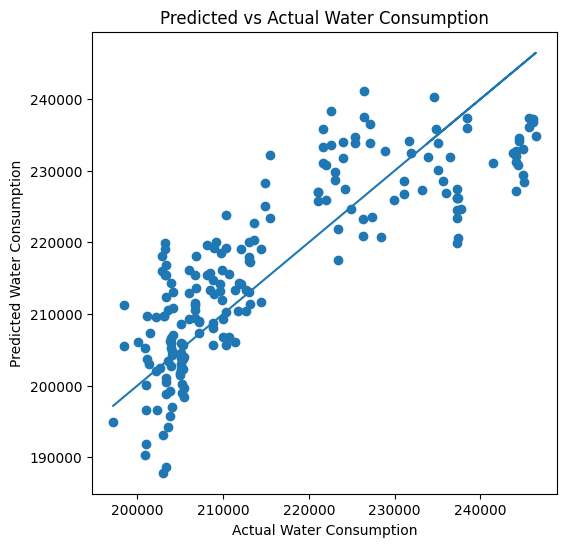

In [ ]:
# prompt: plot predicted vs actual water_consumption based on sklearn model

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
plt.scatter(y, model_multivariate.predict(X1))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)
plt.show()


CAPTION

Text(0, 0.5, 'Water Consumption')

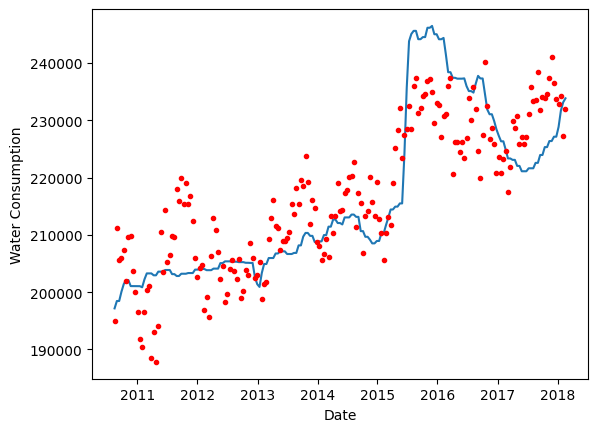

In [ ]:
plt.plot(df['Date'], y)
plt.plot(df['Date'], model_multivariate.predict(X1), 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

CAPTION

## 3D) SIMPLIFY THE MODEL
 You can simplify the model! this is what they did in  https://www.mdpi.com/2079-9276/8/3/156



### 3D - 1) Only use the columns that have a correlation higher than 0.5  $r>0.5$ with Water_consumption

In [ ]:
corr = df_copy.iloc[:,1:].corr()

high_corr_features = corr[corr['Water_Consumption'] > 0.5].index.tolist()
high_corr_features.remove('Water_Consumption')

In [ ]:
vars2 = high_corr_features #you can do this programmatically using the result of the code above, or just read out the variable corelation and typing the names of the variables in a list here

### 3D - 2) redo a multivariate fit with sklearn, just like above

In [ ]:
X2 = df_copy[vars2]

# Select the target variable (dependent variable)
y = df_copy['Water_Consumption']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.25, random_state = 42)
# Create a Linear Regression model
model_multivariate_restricted = LinearRegression(fit_intercept = True)
# Fit the model to the training data
model_multivariate_restricted.fit(X_train, y_train)
# Make predictions on the testing data
y_pred_test = model_multivariate_restricted.predict(X_test)
# Evaluate the model

mse = mean_squared_error(y_test, y_pred_test)
print(mse)
r2 = r2_score(y_test, y_pred_test)
print(r2)
# Print the coefficients and intercept
print(model_multivariate_restricted.coef_)
print(model_multivariate_restricted.intercept_)

65040922.49918802
0.6422281043258005
[-758.675059   7950.30025901 4397.94525261]
216166.1031745916


# 3D - 3) plot the model predictions, just like above

Text(0, 0.5, 'Water Consumption')

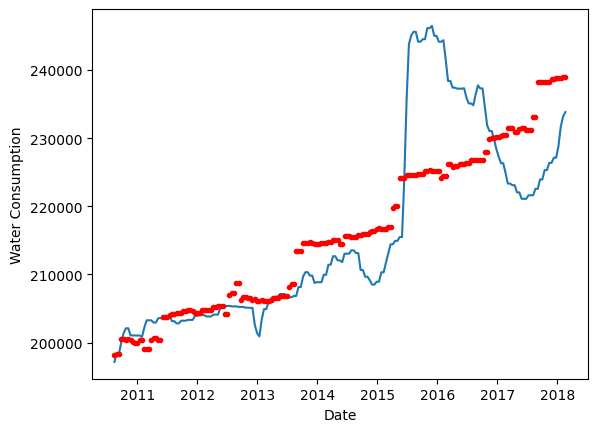

In [ ]:
plt.plot(df['Date'], y)
plt.plot(df['Date'], model_multivariate_restricted.predict(X2), 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

### CAPTION

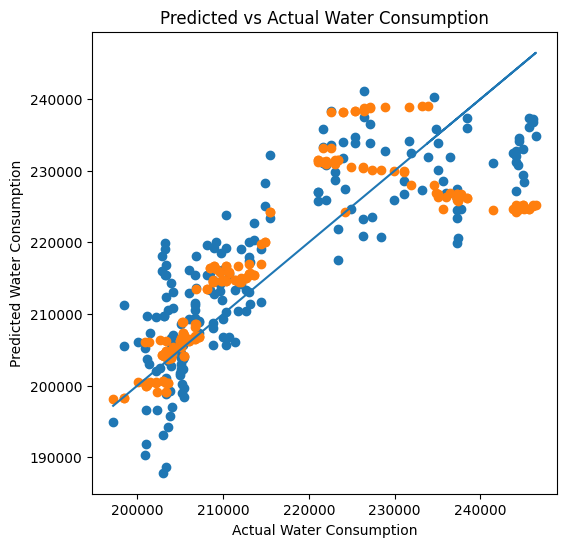

In [ ]:
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
plt.scatter(y, model_multivariate.predict(X1))
plt.scatter(y, model_multivariate_restricted.predict(X2))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)
plt.show()


# CAPTION

which model is better?

# Actually there is no big difference between these models, so delete featrues where correlation between variables and targets is more than 0.5 din't help to make better model